<a href="https://colab.research.google.com/github/adindakkr/MachineLearning1/blob/main/Tugas%20Kelompok%201_Jobsheet%204_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving voice.csv to voice.csv


.

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

Akurasi: 0.9416403785488959
Laporan Klasifikasi:
              precision    recall  f1-score   support

      female       0.98      0.89      0.93       297
        male       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

Matriks Kebingungan:
[[265  32]
 [  5 332]]


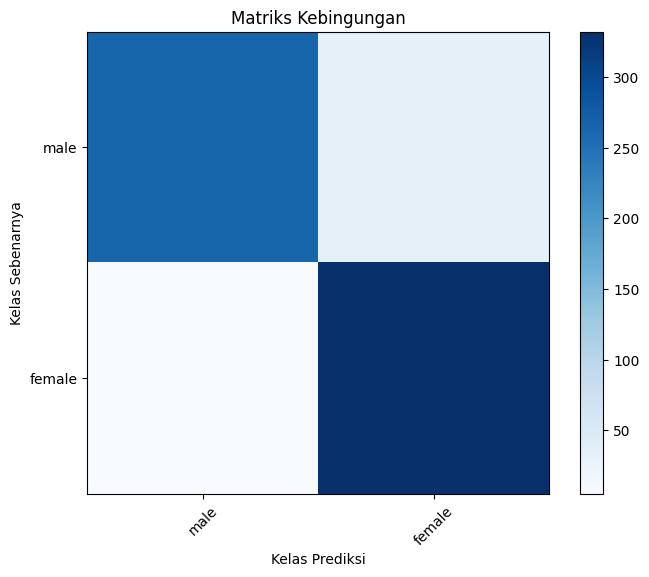

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Langkah 1: Muat data
data = pd.read_csv('voice.csv')

# Langkah 2: Pisahkan fitur (X) dan target (y)
X = data.drop('label', axis=1)
y = data['label']

# Langkah 3: Pra-Pemrosesan Data
# Tidak diperlukan langkah pra-pemrosesan tambahan untuk SVM

# Langkah 4: Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 5: Buat dan latih model SVM
svm_model = SVC(kernel='linear')  # Gunakan kernel linear untuk SVM
svm_model.fit(X_train, y_train)

# Langkah 6: Evaluasi model
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi:', accuracy)

# Tampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Tampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(conf_matrix)

# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriks Kebingungan')
plt.colorbar()

classes = data['label'].unique()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Kelas Sebenarnya')
plt.xlabel('Kelas Prediksi')
plt.show()


.

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya

In [ ]:

from google.colab import files
uploaded = files.upload() # upload dataset

Saving spam.csv to spam.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Langkah 1: Muat data
data = pd.read_csv('spam.csv', encoding='latin-1')  # Sesuaikan encoding jika perlu

# Hapus kolom yang tidak diperlukan
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Langkah 2: Pisahkan fitur (X) dan target (y)
X = data['message']
y = data['label']

# Langkah 3: Pra-Pemrosesan Data
# Menggunakan CountVectorizer dengan pengaktifan stop words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Langkah 4: Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluasi model
y_pred = nb_model.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print('Akurasi:', accuracy)
print('Presisi (spam):', precision)
print('Recall (spam):', recall)
print('F1 Score (spam):', f1)

# Laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))


Akurasi: 0.9802690582959641
Presisi (spam): 0.9266666666666666
Recall (spam): 0.9266666666666666
F1 Score (spam): 0.9266666666666666
Laporan Klasifikasi:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Langkah 1: Muat data
data = pd.read_csv('spam.csv', encoding='latin-1')  # Sesuaikan encoding jika perlu

# Hapus kolom yang tidak diperlukan
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Langkah 2: Pisahkan fitur (X) dan target (y)
X = data['message']
y = data['label']

# Langkah 3: Pra-Pemrosesan Data
# Menggunakan TF-IDF dengan pengaktifan stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Langkah 4: Bagi data menjadi set pelatihan dan pengujian
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Buat dan latih model Multinomial Naive Bayes dengan TF-IDF
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train_tfidf)

# Evaluasi model dengan TF-IDF
y_pred_tfidf = nb_tfidf_model.predict(X_test_tfidf)

# Metrik evaluasi dengan TF-IDF
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
precision_tfidf = precision_score(y_test_tfidf, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test_tfidf, y_pred_tfidf, pos_label='spam')
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, pos_label='spam')

print('Evaluasi dengan TF-IDF:')
print('Akurasi:', accuracy_tfidf)
print('Presisi (spam):', precision_tfidf)
print('Recall (spam):', recall_tfidf)
print('F1 Score (spam):', f1_tfidf)
print('Laporan Klasifikasi:')
print(classification_report(y_test_tfidf, y_pred_tfidf))

# Bandingkan dengan hasil Tugas no 2
print('\nHasil Tugas no 2 (CountVectorizer):')
print('Akurasi:', accuracy)
print('Presisi (spam):', precision)
print('Recall (spam):', recall)
print('F1 Score (spam):', f1)

# Kesimpulan
if accuracy_tfidf > accuracy:
    print('Dengan penggunaan TF-IDF, model Multinomial Naive Bayes memberikan performa yang lebih baik dibandingkan dengan penggunaan CountVectorizer.')
elif accuracy_tfidf == accuracy:
    print('Performa model dengan penggunaan TF-IDF sama dengan performa model dengan penggunaan CountVectorizer.')
else:
    print('Dengan penggunaan CountVectorizer, model Multinomial Naive Bayes memberikan performa yang lebih baik dibandingkan dengan penggunaan TF-IDF.')


Evaluasi dengan TF-IDF:
Akurasi: 0.968609865470852
Presisi (spam): 1.0
Recall (spam): 0.7666666666666667
F1 Score (spam): 0.8679245283018869
Laporan Klasifikasi:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Hasil Tugas no 2 (CountVectorizer):
Akurasi: 0.9802690582959641
Presisi (spam): 0.9266666666666666
Recall (spam): 0.9266666666666666
F1 Score (spam): 0.9266666666666666
Dengan penggunaan CountVectorizer, model Multinomial Naive Bayes memberikan performa yang lebih baik dibandingkan dengan penggunaan TF-IDF.
